In [1]:
# Libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
# set visualization style
sns.set(style='whitegrid')
import os

### Load Data from CSV file of the comppany

In [4]:
hdfc = pd.read_csv('Inputs/hdfc_bank_data.csv')
sbi = pd.read_csv('Inputs/sbi_data.csv')
icici = pd.read_csv('Inputs/icici_bank_data.csv')

hdfc['Date'] = pd.to_datetime(hdfc['Date'])
sbi['Date'] = pd.to_datetime(sbi['Date'])
icici['Date'] = pd.to_datetime(icici['Date'])

# preview each dataset

print('hdfc Data:\n', hdfc.head())
print('sbi Data:\n', sbi.head())
print('icici Data:\n', icici.head())

hdfc Data:
         Date         Open         High          Low        Close   Volume
0 2022-05-30  1360.510904  1370.399390  1349.127040  1352.117798  6312337
1 2022-05-31  1346.667105  1355.253228  1331.327869  1339.962158  6742694
2 2022-06-01  1331.327831  1351.056519  1330.507834  1345.654053  6045948
3 2022-06-02  1338.322119  1339.045666  1329.977178  1336.247925  5737510
4 2022-06-03  1348.982455  1351.345998  1327.758388  1331.617310  3478622
sbi Data:
         Date        Open        High         Low       Close    Volume
0 2022-05-30  447.348550  451.037042  445.551596  448.861786   9365470
1 2022-05-31  448.294293  450.564131  439.782376  442.714264  15441579
2 2022-06-01  442.619693  446.402767  439.498668  442.903412   9424008
3 2022-06-02  441.579356  446.733806  440.870029  444.369385   9370989
4 2022-06-03  447.584984  449.712964  438.363741  439.309509  11306291
icici Data:
         Date        Open        High         Low       Close    Volume
0 2022-05-30  731.90636

### Data Overview and structure of data

In [6]:
#Shape of dataset
print('HDFC Shape:', hdfc.shape)
print('Sbi shape:', sbi.shape)
print('Icici Shape:', icici.shape)

#Column names
print('hdfc columns:', hdfc.columns)
print('sbi columns:', sbi.columns)
print('icici columns:', icici.columns)

# Data types and null values
for df, name in zip([hdfc, sbi, icici], ['HDFC', 'SBI', 'ICICI']):
    print(f"\n{name} Info:")
    print(df.info())
    print(f"\n{name} Null Values:\n", df.isnull().sum())

HDFC Shape: (741, 6)
Sbi shape: (741, 6)
Icici Shape: (741, 6)
hdfc columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
sbi columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
icici columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

HDFC Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    741 non-null    datetime64[ns]
 1   Open    741 non-null    float64       
 2   High    741 non-null    float64       
 3   Low     741 non-null    float64       
 4   Close   741 non-null    float64       
 5   Volume  741 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 34.9 KB
None

HDFC Null Values:
 Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

SBI Info:
<class 'pandas

In [7]:
# Descriptive statistics for each dataset
for df, name in zip([hdfc, sbi, icici], ['HDFC', 'SBI', 'ICICI']):
    print(f"\n{name} Descriptive Statistics:")
    print(df.describe())


HDFC Descriptive Statistics:
                                Date         Open         High          Low  \
count                            741   741.000000   741.000000   741.000000   
mean   2023-11-26 08:46:38.380567040  1568.733294  1581.581667  1556.797883   
min              2022-05-30 00:00:00  1230.031093  1253.184619  1226.750986   
25%              2023-02-22 00:00:00  1461.299906  1475.072800  1450.954448   
50%              2023-11-24 00:00:00  1576.882766  1587.897806  1564.441249   
75%              2024-08-29 00:00:00  1642.846400  1657.713272  1629.127891   
max              2025-05-29 00:00:00  1957.366856  1957.366856  1913.944584   
std                              NaN   140.936322   141.511872   139.550733   

             Close        Volume  
count   741.000000  7.410000e+02  
mean   1569.279083  1.512762e+07  
min    1236.109009  0.000000e+00  
25%    1467.011353  7.592403e+06  
50%    1576.687622  1.266125e+07  
75%    1644.310791  1.809180e+07  
max    1940.3

### Data Cleaning Handle missing or incorrect data.

In [8]:
# fill missing values (if any) with forward fill

for df in [hdfc, sbi, icici]:
    df.fillna(method = 'ffill', inplace = True)
# Ensure no missing values remain
for df, name in zip([hdfc, sbi, icici], ['HDFC', 'SBI', 'ICICI']):
    print(f"{name} Missing values after cleaning:\n", df.isnull().sum())

HDFC Missing values after cleaning:
 Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
SBI Missing values after cleaning:
 Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
ICICI Missing values after cleaning:
 Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


/tmp/ipykernel_42840/762871448.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method = 'ffill', inplace = True)


# Visualization
 ### 1. Time Series Plot

  Visualize  stock  price  over  time 

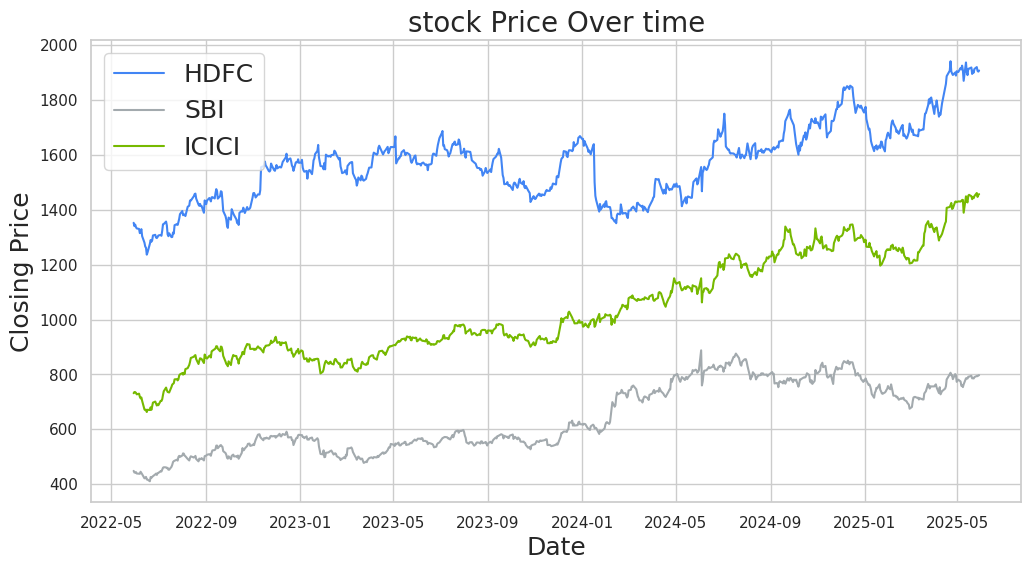

In [9]:
plt.figure(figsize=(12, 6))
for df, label, col, in zip([hdfc, sbi, icici], ['HDFC', 'SBI', 'ICICI'], ['#4285F4','#A3AAAE', '#76B900']):
    plt.plot(pd.to_datetime(df['Date']), df['Close'], label=label, color = col)
plt.title('stock Price Over time', fontsize = 20)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price', fontsize = 18)
plt.legend(fontsize = 18)
plt.show()

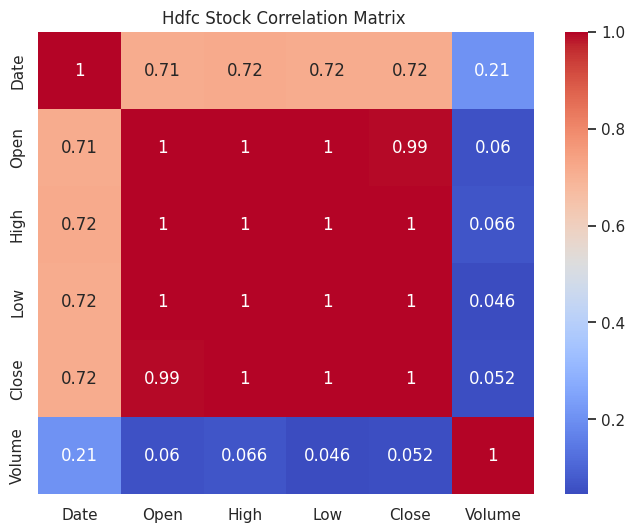

In [10]:
# Correlation for hdfc
hdfc_corr = hdfc.corr()

#Heatmap
plt.figure(figsize = (8,6))
sns.heatmap(hdfc_corr, annot = True, cmap = 'coolwarm')
plt.title('Hdfc Stock Correlation Matrix ')
plt.show()

# Volume of Sales 

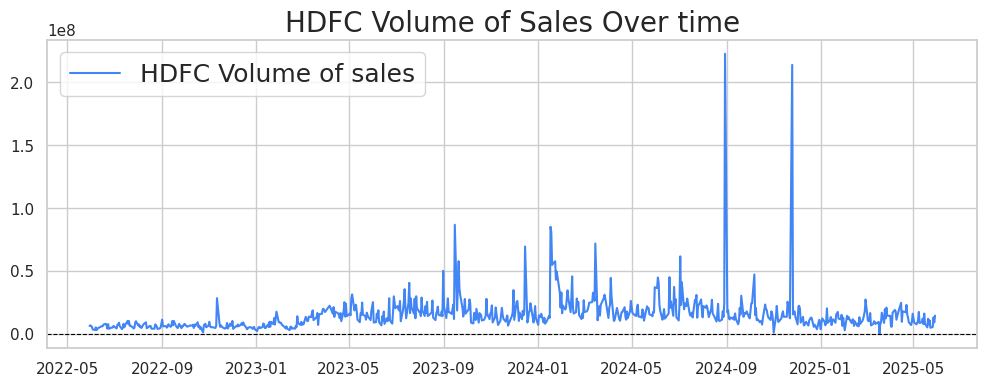

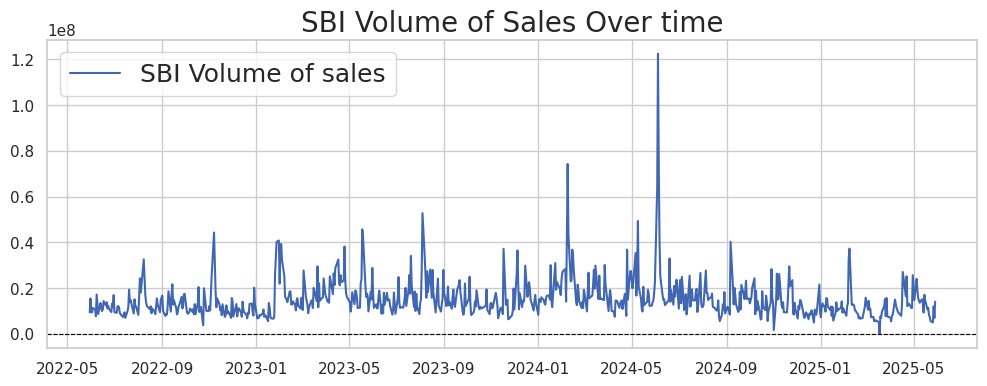

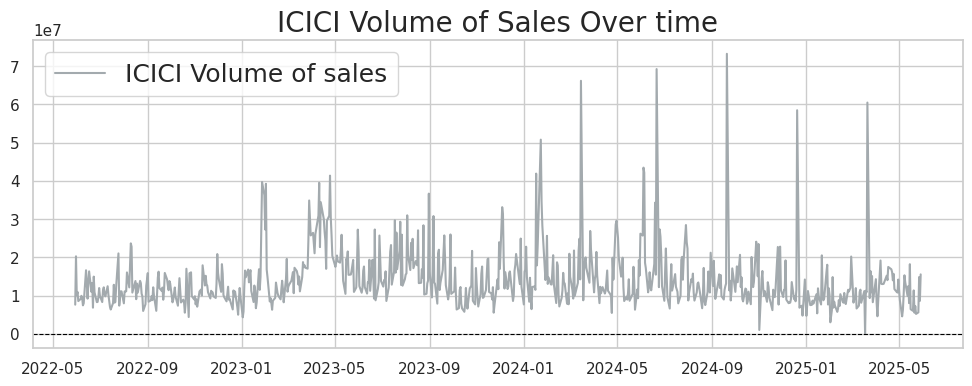

In [11]:
# Add daily return for each dataset.

for df, name, col, in zip([hdfc, sbi, icici], ['HDFC', 'SBI', 'ICICI'],["#4285F4","#4267B2","#A3AAAE"]):
    plt.figure(figsize=(12, 4))
    plt.plot(pd.to_datetime(df['Date']), df['Volume'], label = f'{name} Volume of sales', color = col)
    plt.axhline(0, color = 'black', linestyle = '--', linewidth = 0.8)
    plt.title(f'{name} Volume of Sales Over time', fontsize = 20)
    plt.legend(fontsize = 18)
    plt.show()

### Calculating daily return and ploting daily percentage return

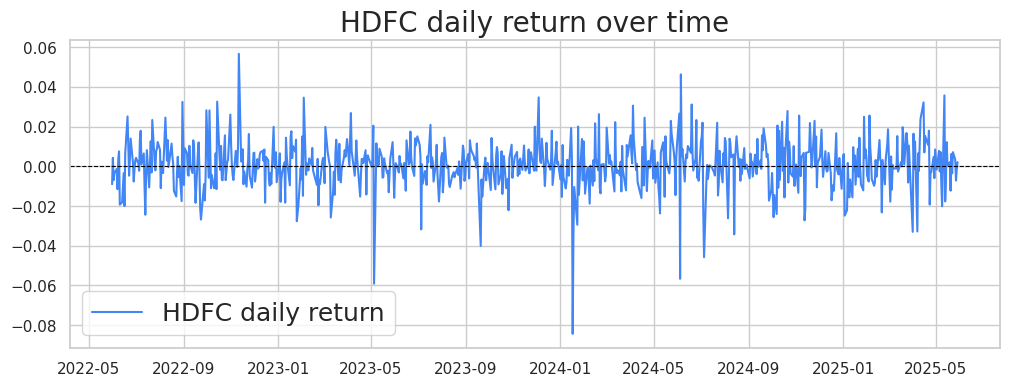

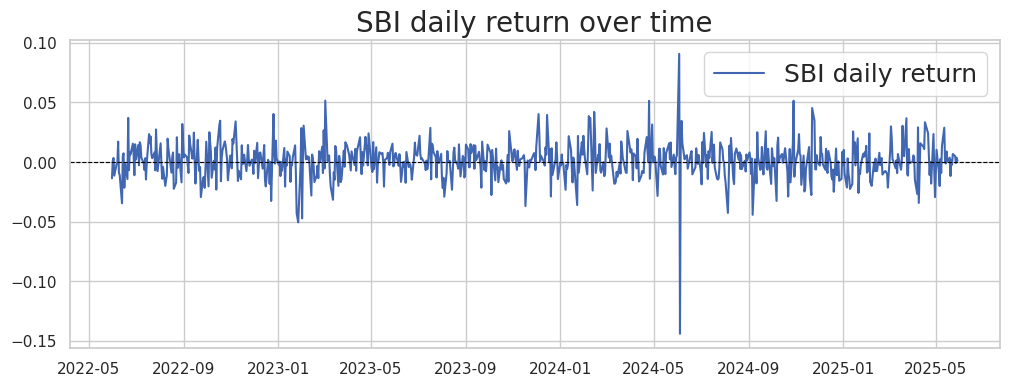

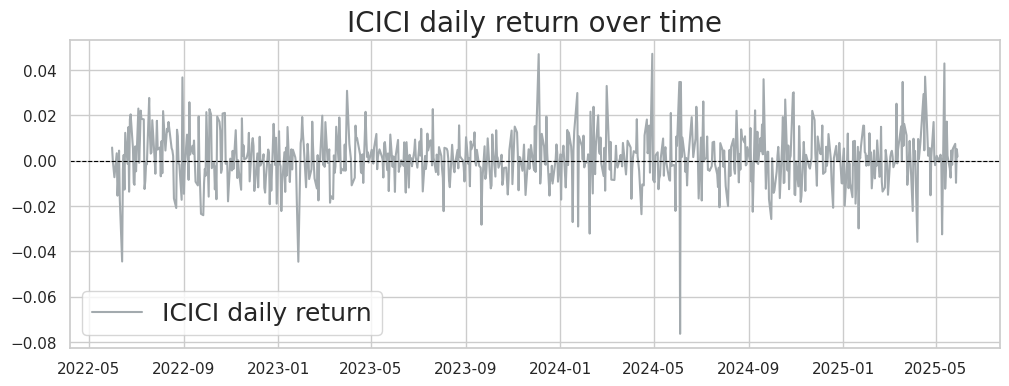

In [13]:
for df, name, col, in zip([hdfc, sbi, icici], ['HDFC', 'SBI', 'ICICI'],["#4285F4","#4267B2","#A3AAAE"]):
    df['daily_return'] = df['Close'].pct_change()
    plt.figure(figsize=(12, 4))
    plt.plot(pd.to_datetime(df['Date']), df['daily_return'], label = f'{name} daily return', color = col)
    plt.axhline(0, color = 'black', linestyle ='--', linewidth=0.8)
    plt.title(f'{name} daily return over time', fontsize = 20)
    plt.legend(fontsize = 18)
    plt.show()